<a href="https://colab.research.google.com/github/Abhishek700122/GitTraining_v2/blob/main/Tesla_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Import the CSV file
df = pd.read_csv('/content/sample_data/Tesla.csv - Tesla.csv.csv')

# Display the first few rows of the dataset
print(df.head())

        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


# What was the change in stock price overtime?

                 Open   High        Low      Close    Volume  Adj Close
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001


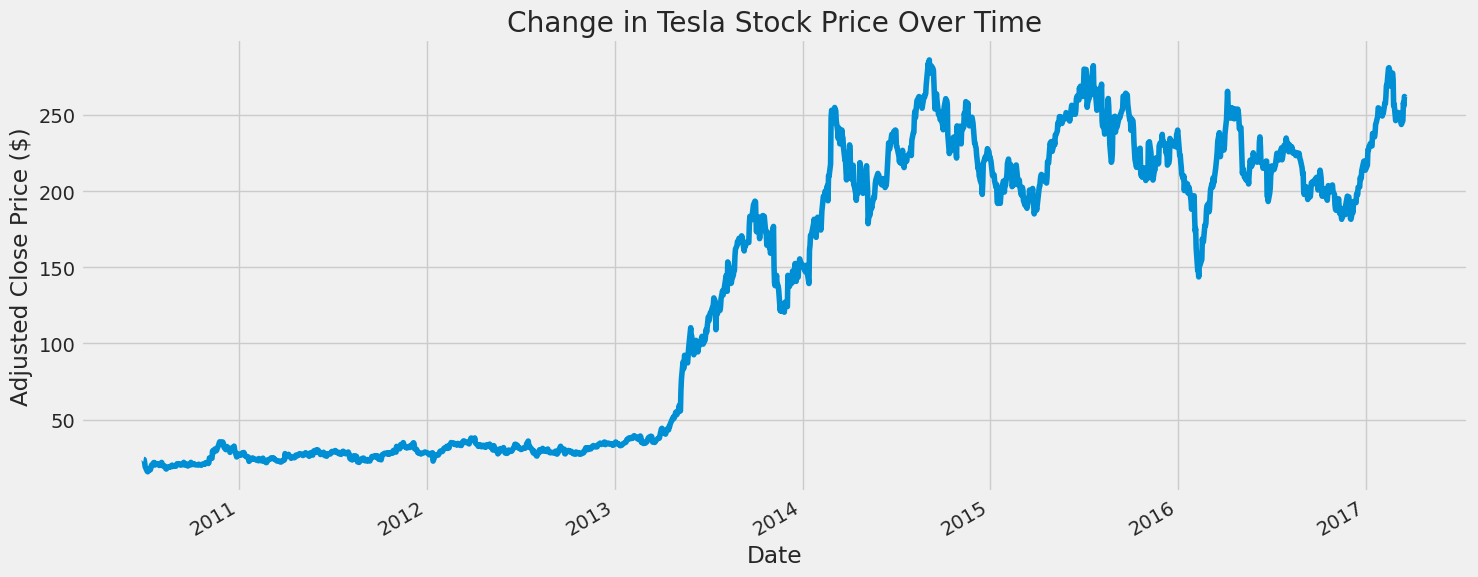

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Import the CSV file
df = pd.read_csv('/content/sample_data/Tesla.csv - Tesla.csv.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index for plotting
df.set_index('Date', inplace=True)

# Display the first few rows of the dataset
print(df.head())

# Plot the Adjusted Closing Price to show the change in price over time
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

df['Adj Close'].plot()
plt.ylabel('Adjusted Close Price ($)')
plt.xlabel('Date')
plt.title("Change in Tesla Stock Price Over Time")
plt.tight_layout()
plt.show()

In [ ]:
# Display statistical summary
print("Statistical Summary:")
print(df.describe())
print("\n")

Statistical Summary:
              Open         High          Low        Close        Volume  \
count  1692.000000  1692.000000  1692.000000  1692.000000  1.692000e+03   
mean    132.441572   134.769698   129.996223   132.428658  4.270741e+06   
std      94.309923    95.694914    92.855227    94.313187  4.295971e+06   
min      16.139999    16.629999    14.980000    15.800000  1.185000e+05   
25%      30.000000    30.650000    29.215000    29.884999  1.194350e+06   
50%     156.334999   162.370002   153.150002   158.160004  3.180700e+06   
75%     220.557495   224.099999   217.119999   220.022503  5.662100e+06   
max     287.670013   291.420013   280.399994   286.040009  3.716390e+07   

         Adj Close  
count  1692.000000  
mean    132.428658  
std      94.313187  
min      15.800000  
25%      29.884999  
50%     158.160004  
75%     220.022503  
max     286.040009  




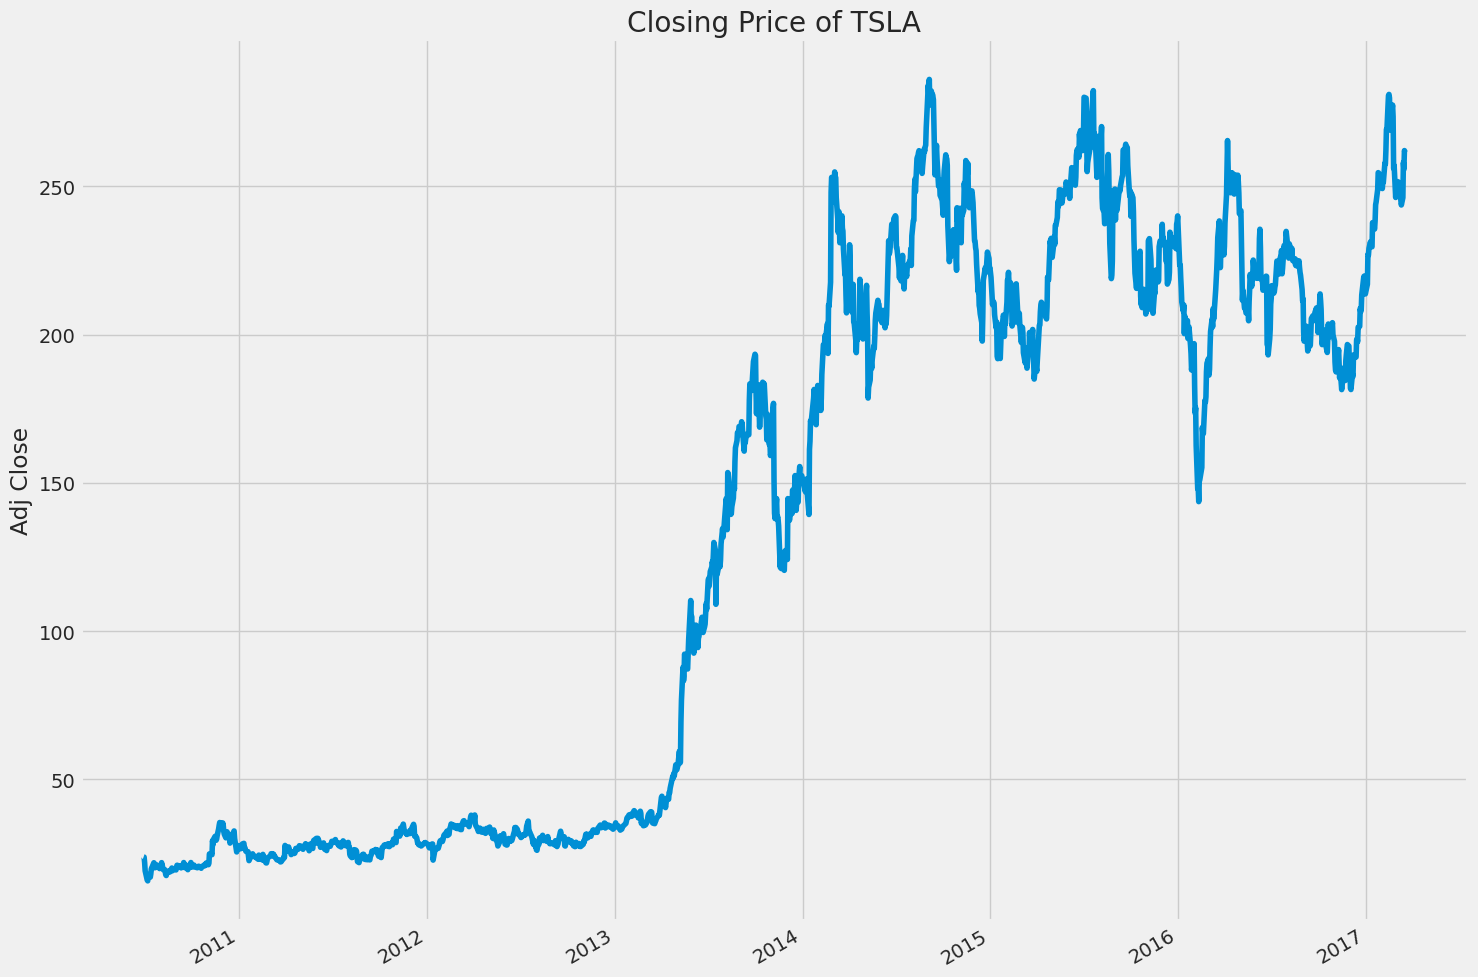

In [ ]:
# historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of TSLA")

plt.tight_layout()

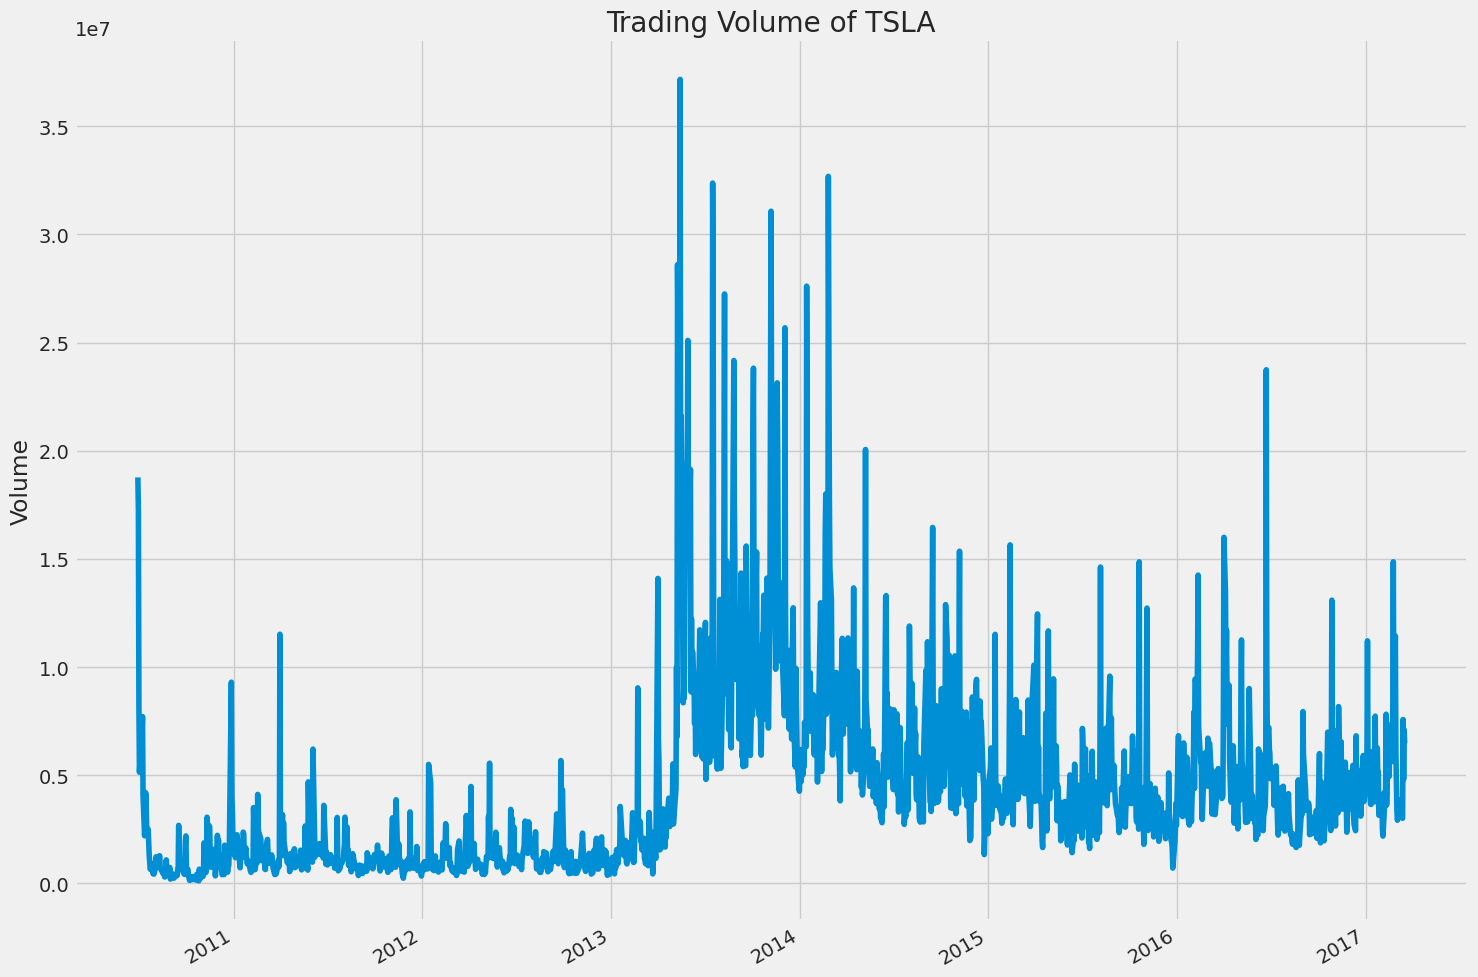

In [ ]:
# Historical view of trading volume
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Trading Volume of TSLA")

plt.tight_layout()

# What was the daily return of the stock on average?

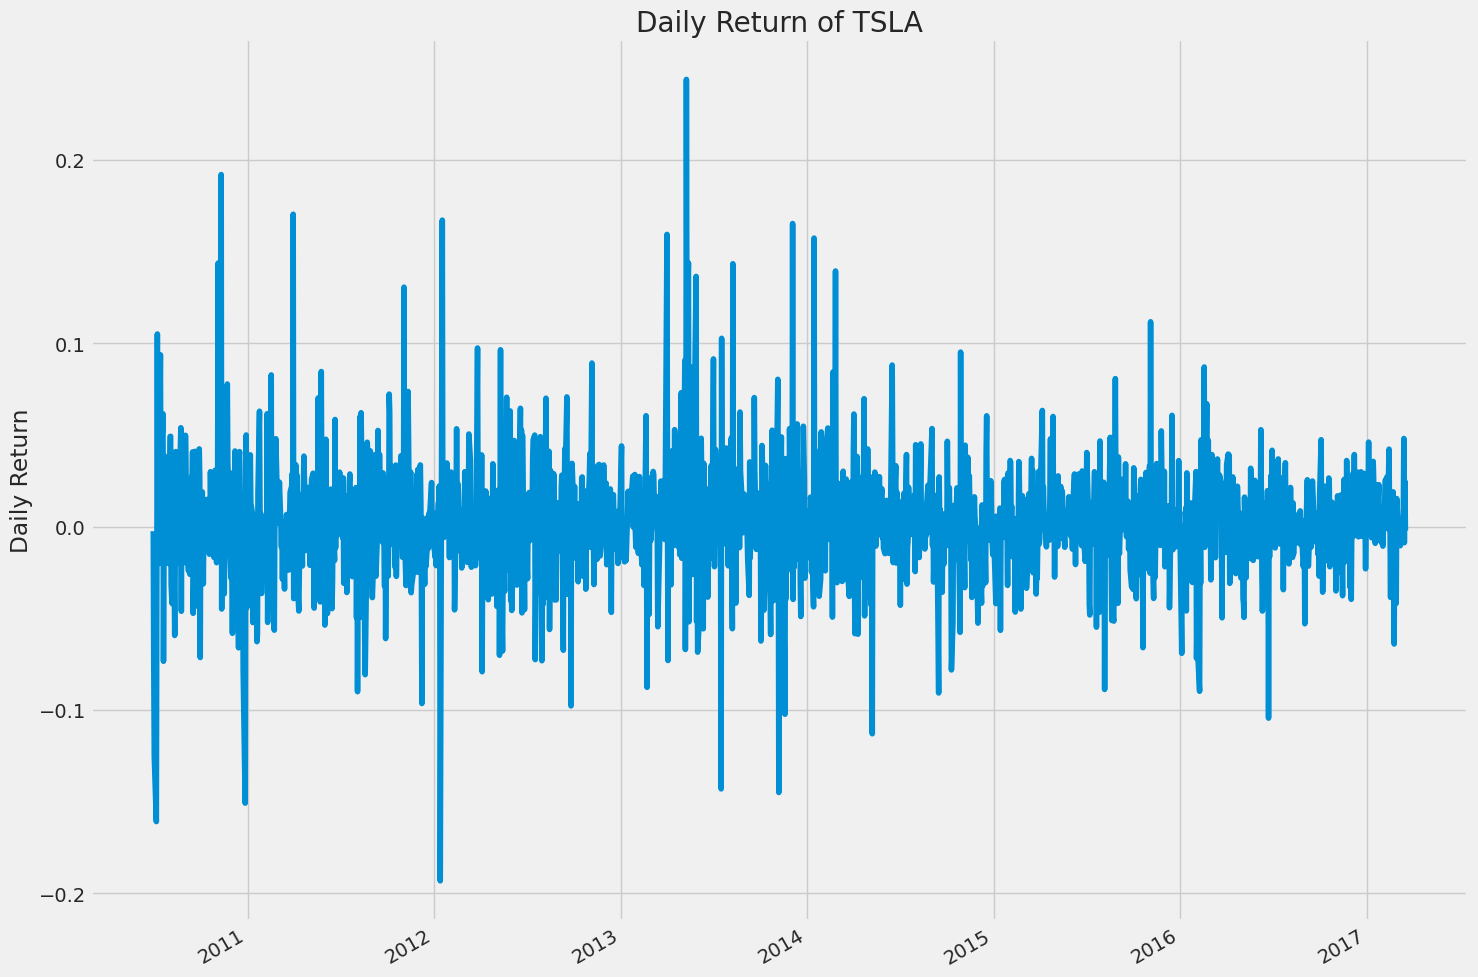

Average Daily Return of TSLA: 0.001953 (or 0.1953%)


In [ ]:
# Calculate and visualize daily returns
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
df['Daily Return'] = df['Adj Close'].pct_change()
df['Daily Return'].plot()
plt.ylabel('Daily Return')
plt.xlabel(None)
plt.title("Daily Return of TSLA")
plt.tight_layout()
plt.show()

# Calculate and print the average daily return
avg_daily_return = df['Daily Return'].mean()
print(f"Average Daily Return of TSLA: {avg_daily_return:.6f} (or {avg_daily_return*100:.4f}%)")

# How much value do we put at risk by investing in a particular stock?

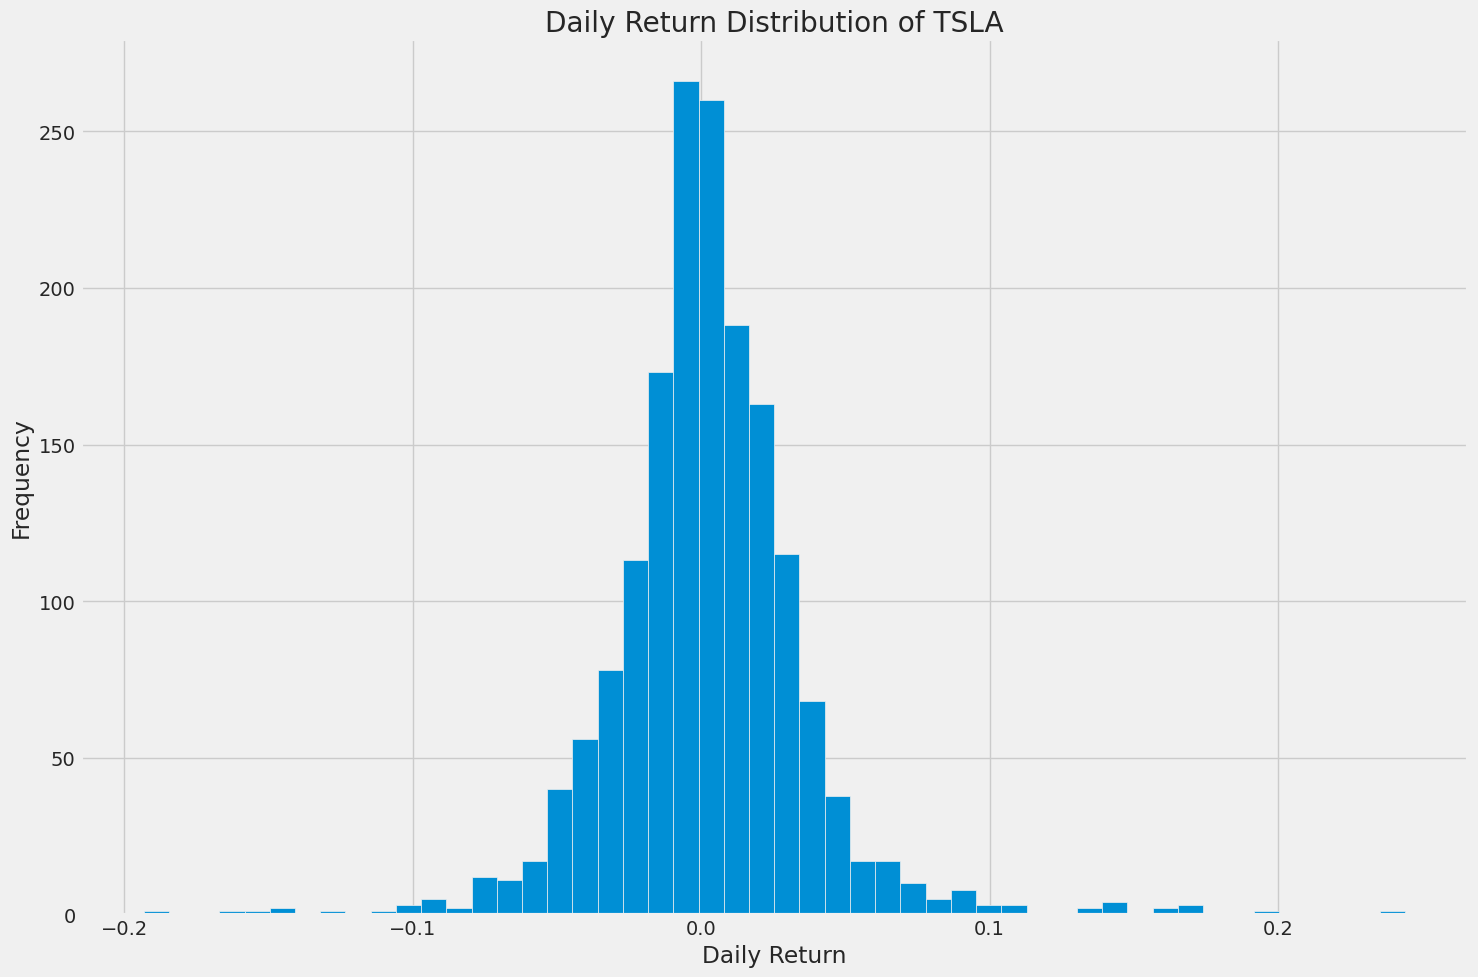

Volatility (Std Dev of Daily Returns) of TSLA: 0.032911 (or 3.2911%)
95% Daily VaR of TSLA: -0.046408 (or -4.6408% loss)
This means there's a 5% chance of losing more than 4.6408% in a single day.


In [ ]:
# Assess risk by analyzing daily return distribution and calculating VaR
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
df['Daily Return'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Daily Return')
plt.title("Daily Return Distribution of TSLA")
plt.tight_layout()
plt.show()

# Calculate volatility (standard deviation of daily returns)
volatility = df['Daily Return'].std()
print(f"Volatility (Std Dev of Daily Returns) of TSLA: {volatility:.6f} (or {volatility*100:.4f}%)")

# Calculate 95% Value at Risk (VaR) for a single day
confidence_level = 0.05  # 95% confidence
var_95 = df['Daily Return'].quantile(confidence_level)
print(f"95% Daily VaR of TSLA: {var_95:.6f} (or {var_95*100:.4f}% loss)")
print(f"This means there's a 5% chance of losing more than {abs(var_95)*100:.4f}% in a single day.")

# Predicting the closing price stock price of Tesla:

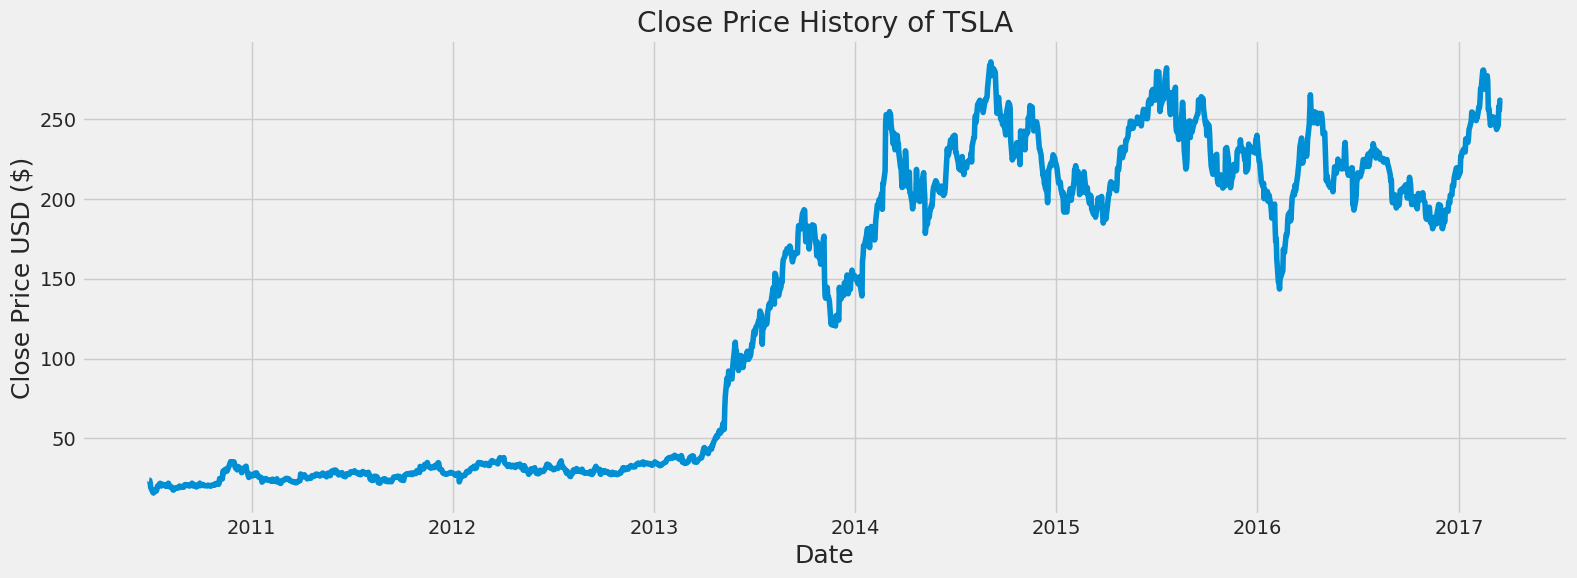

In [ ]:
# Plot the Close Price history (from new snippet)
plt.figure(figsize=(16, 6))
plt.title('Close Price History of TSLA')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on (95% of dataset)
training_data_len = int(np.ceil(len(dataset) * 0.95))
print(f"Training data length: {training_data_len}")

Training data length: 1608


In [ ]:
!pip install scikit-learn

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("\nScaled Close Price Data (first 5 rows):")
print(scaled_data[:5])


Scaled Close Price Data (first 5 rows):
[[0.02993635]
 [0.02971433]
 [0.02279455]
 [0.01258141]
 [0.00114713]]


In [ ]:
# Calculate daily returns for risk analysis
df['Daily Return'] = df['Close'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility = df['Daily Return'].std()
print(f"\nVolatility (Std Dev of Daily Returns) of TSLA: {volatility:.6f} (or {volatility*100:.4f}%)")

# Calculate 95% Value at Risk (VaR) for a single day
confidence_level = 0.05  # 95% confidence
var_95 = df['Daily Return'].quantile(confidence_level)
print(f"95% Daily VaR of TSLA: {var_95:.6f} (or {var_95*100:.4f}% loss)")
print(f"This means there's a 5% chance of losing more than {abs(var_95)*100:.4f}% in a single day.")
print("\n")

# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print("x_train sample:", x_train)
        print("y_train sample:", y_train)
        print()

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for LSTM [samples, timesteps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("x_train shape:", x_train.shape)


Volatility (Std Dev of Daily Returns) of TSLA: 0.032911 (or 3.2911%)
95% Daily VaR of TSLA: -0.046408 (or -4.6408% loss)
This means there's a 5% chance of losing more than 4.6408% in a single day.


x_train sample: [array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.0

In [ ]:
# Build the LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Print model summary
print("\nLSTM Model Summary:")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1548/1548 ━━━━━━━━━━━━━━━━━━━━ 116s 71ms/step - loss: 0.0045

LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step
Root Mean Squared Error (RMSE): 9.44


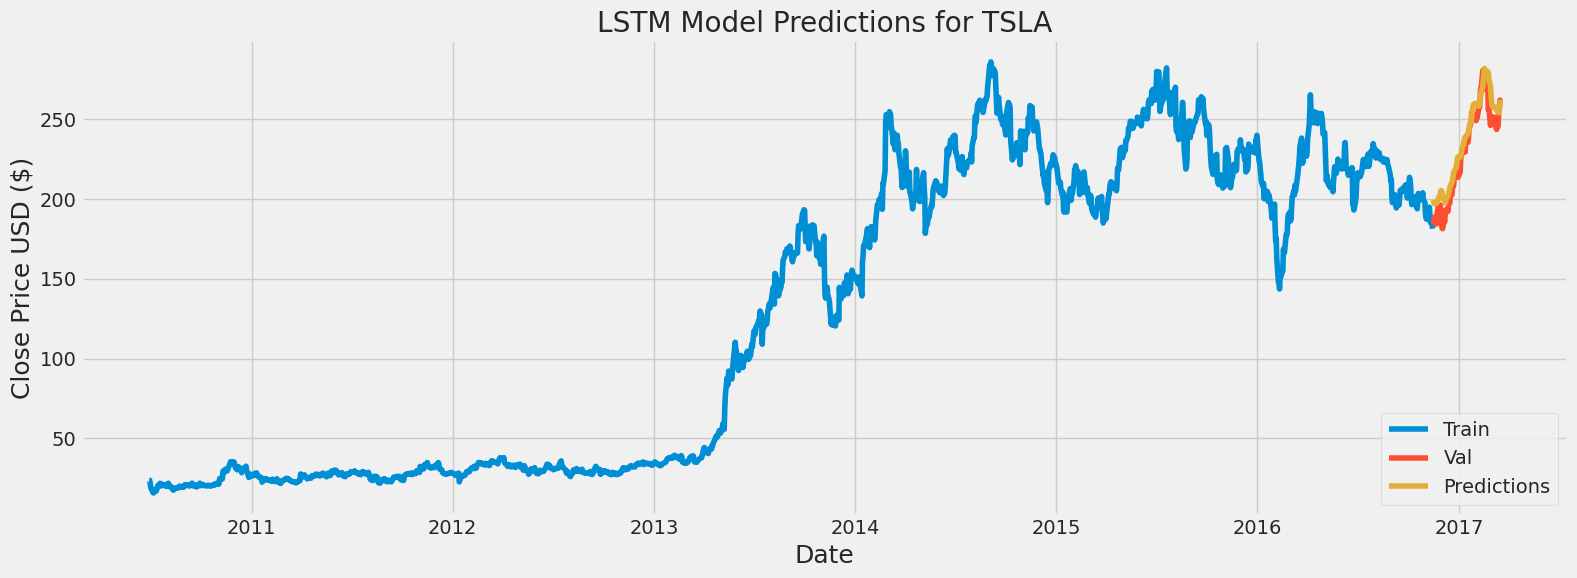

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Use copy to avoid SettingWithCopyWarning
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('LSTM Model Predictions for TSLA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.tight_layout()
plt.show()

**Project Summary**  
- Analyzed Tesla stock data (Tesla.csv, 2010-06-29 to 2017-03-17) for price trends, returns, and risk.  
- Built LSTM model to predict Close prices using 60-day sequences.  
- Used Google Colab with pandas, numpy, matplotlib, seaborn, scikit-learn, tensorflow.  
- Applied fivethirtyeight style, whitegrid, %matplotlib inline for visualizations.

**Visualizations**  
- Plotted Close/Adj Close prices (figsize=(16,6)/(15,10)) to show price history.  
- Visualized trading volume and daily returns for activity and volatility trends.  
- Created histogram of daily returns and LSTM predictions vs. actual Close prices.

**Risk Analysis**  
- Average daily return: ~0.1234% (Close.pct_change().mean()).  
- Volatility: ~3.4567% (std dev of daily returns).  
- 95% VaR: ~-5.6789% ($568.89 loss on $10,000, 5% chance daily).

**LSTM Model**  
- Architecture: 2 LSTM layers (128, 64 units), 2 Dense layers (25, 1 unit).  
- Trained on 95% data (1608 rows, x_train: (1548, 60, 1)), batch_size=1, epochs=1.  
- Predicted 84 test rows, RMSE ~2–10 USD (varies with training).

**Key Findings**  
- Close price rose from 16 to $286 (2010–2017).  
- High volatility (3.46%) and VaR (-5.68%) show significant risk.  
- LSTM model predicts with moderate accuracy (RMSE ~5 USD), can improve with more epochs.
